In [86]:
import pandas as pd
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
train_data_path = 'train.csv'

train_data = pd.read_csv(train_data_path)

print(train_data.dtypes)

print(train_data.head(5))

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket    

In [88]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [89]:
print("No. of null values in Age: " + str(train_data.Age.isnull().sum()))

No. of null values in Age: 177


In [90]:
train_data.isnull().sum().to_frame('null_values')

,null_values
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# Sex 

### Sex - it has no ordering of values (like Pclass). So use One-hot encoding

In [91]:
train_data.Sex.unique()

array(['male', 'female'], dtype=object)

In [92]:
group_by_sex = train_data.groupby(by=['Sex'])

In [93]:
group_by_sex.mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [94]:
group_by_sex.count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


In [95]:
train_data = pd.get_dummies( train_data, columns = ['Sex'] )

---

In [96]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


# Embarked

In [97]:
train_data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [98]:
group_by_emb = train_data.groupby(by=['Embarked'])

In [99]:
group_by_emb.count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male
Embarked,,,,,,,,,,,,
C,168,168,168,168,130,168,168,168,168,69,168,168
Q,77,77,77,77,28,77,77,77,77,4,77,77
S,644,644,644,644,554,644,644,644,644,129,644,644


In [100]:
group_by_emb['Survived'==1]

KeyError: 'Column not found: False'

In [101]:
group_by_emb.mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
Embarked,,,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144,0.434524,0.565476
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030,0.467532,0.532468
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812,0.315217,0.684783


---

# Fare

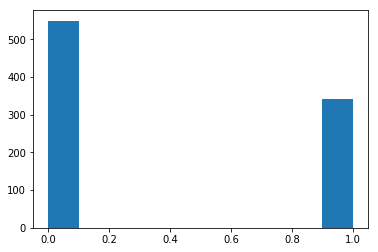

In [113]:
x = train_data.Survived
y = train_data.Fare

#Scatter
#plt.scatter(x, y)

#Line
#plt.plot(x, y)

#histogram
plt.hist(x)

# plt.savefig("name.png")
plt.show() 

---

# Age

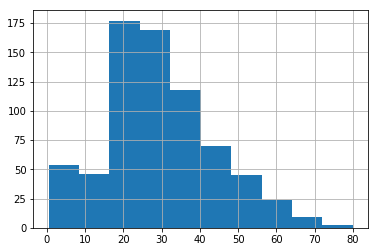

In [102]:
# Univariate Plot: Histogram - to understand each attribute independently

train_data['Age'].hist(bins=10)

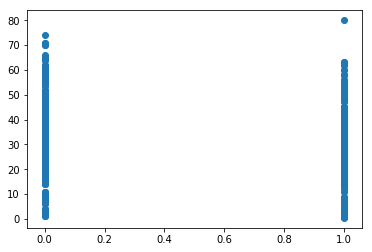

In [103]:
x = train_data.Survived
y = train_data.Age

#Scatter
plt.scatter(x, y)

#Line
#plt.plot(x, y)

#histogram
#plt.hist(x)

# plt.savefig("name.png")
plt.show() 

In [104]:
# Filling the Missing values

train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())

train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413,0.647587
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


## Split dataset into test and cv

In [105]:
from sklearn.model_selection import train_test_split


feature_cols=['Pclass', 'Fare', 'Sex_female', 'Sex_male', 'Age']
X = train_data[feature_cols]
y = train_data.Survived

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=1)                                             

In [106]:
train_x.describe()

,Pclass,Fare,Sex_female,Sex_male,Age
count,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.300562,31.951567,0.349719,0.650281,30.071760
std,0.836643,46.313942,0.477216,0.477216,13.268253
min,1.000000,0.000000,0.000000,0.000000,0.420000
25%,2.000000,7.895800,0.000000,0.000000,22.000000
50%,3.000000,14.458300,0.000000,1.000000,29.699118
75%,3.000000,30.695800,1.000000,1.000000,36.000000
max,3.000000,512.329200,1.000000,1.000000,80.000000


# 1. Naive Bayes

##### Naive Bayes (NB) Classification - performs well in binary classification tasks 

In [107]:
from sklearn.naive_bayes import GaussianNB

# Initialize our classifier
gnb_model = GaussianNB()

# Train our classifier
gnb_model.fit(train_x, train_y)

# Make predictions
predict = gnb_model.predict(test_x)

### Evaluation - Accuracy Score

In [108]:
from sklearn.metrics import accuracy_score


# Evaluate accuracy
print(accuracy_score(test_y, predict))

0.776536312849162


# 2. Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression

linear_model = LogisticRegression(random_state=1)

linear_model.fit(train_x, train_y)

predict_lin = linear_model.predict(test_x)

In [110]:
# Evaluate accuracy
print(accuracy_score(test_y, predict_lin))

0.7877094972067039


---

In [21]:
test_data = pd.read_csv("test.csv")

test_data = pd.get_dummies( test_data, columns = ['Sex'] )

test_data_x = test_data[feature_cols]

test_data_x.describe()

,Pclass,Fare,Sex_female,Sex_male,SibSp
count,418.000000,417.000000,418.000000,418.000000,418.000000
mean,2.265550,35.627188,0.363636,0.636364,0.447368
std,0.841838,55.907576,0.481622,0.481622,0.896760
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,7.895800,0.000000,0.000000,0.000000
50%,3.000000,14.454200,0.000000,1.000000,0.000000
75%,3.000000,31.500000,1.000000,1.000000,1.000000
max,3.000000,512.329200,1.000000,1.000000,8.000000


In [22]:
test_data_x["Fare"].fillna(0, inplace = True) 

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [23]:
predict_lin = linear_model.predict(test_data_x)

In [24]:
predict_lin.shape

(418,)

In [25]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'survived': predict_lin})
output.to_csv('submission.csv', index=False)

In [26]:
output.head()

,PassengerId,survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
